# Module Setup

### Import Modules

In [2]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [4]:
dataset = pd.read_csv('breast-cancer.csv')

In [5]:
dataset.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


# Data Preprocessing

### Missing Data

In [6]:
dataset.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [23]:
dataset[dataset['breast-quad']==None]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [6]:
missing = dataset['node-caps'].values.reshape(-1,1)
dataset['node-caps'] = imputer.fit_transform(missing)

In [7]:
missing1 = dataset['breast-quad'].values.reshape(-1,1)
dataset['breast-quad'] = imputer.fit_transform(missing1)

In [8]:
dataset.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_mask = dataset.dtypes==object
cat_cols=dataset.columns[cat_mask].tolist()
dataset[cat_cols]=dataset[cat_cols].apply(lambda col: encoder.fit_transform(col))

In [10]:
dataset.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,2,2,2,0,1,3,1,2,0,1
1,3,0,2,0,0,1,1,0,0,0
2,3,0,6,0,0,2,0,1,0,1
3,2,2,6,0,1,3,1,1,1,0
4,2,2,5,4,1,2,0,4,0,1


# Exploratory Data Analysis

In [11]:
numeric_features = dataset.select_dtypes(include=[np.number])
numeric_features.dtypes
corr =numeric_features.corr()

print(corr['irradiat'].sort_values(ascending=False))

irradiat       1.000000
inv-nodes      0.382650
node-caps      0.303955
deg-malig      0.208099
Class          0.193912
tumor-size     0.159568
menopause      0.041752
breast         0.018761
breast-quad    0.014971
age           -0.042080
Name: irradiat, dtype: float64


In [12]:
Names = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 
         'node-caps', 'deg-malig', 'breast', 'breast-quad']
x = dataset[Names]
y = dataset['irradiat']

In [13]:
print('Predictor Variable:', x.head(), sep = '\n')
print('Target Variable:',y.head(), sep = '\n')

Predictor Variable:
   Class  age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      1    2          2           2          0          1          3       1   
1      0    3          0           2          0          0          1       1   
2      1    3          0           6          0          0          2       0   
3      0    2          2           6          0          1          3       1   
4      1    2          2           5          4          1          2       0   

   breast-quad  
0            2  
1            0  
2            1  
3            1  
4            4  
Target Variable:
0    0
1    0
2    0
3    1
4    0
Name: irradiat, dtype: int64


# Feature Engineering

### PCA 

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
x_r = pca.fit_transform(x)

Text(0.5, 1.0, 'PCA for 2 attributes')

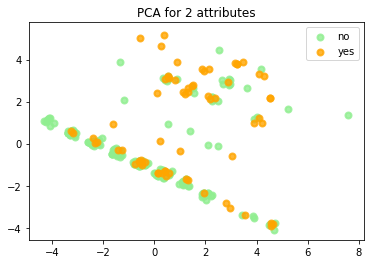

In [15]:
target_names = ['no', 'yes']

plt.figure()
colors = ['lightgreen', 'orange']

for colors, i, target_names in zip(colors, [0,1], target_names):
    plt.scatter(x_r[y==i,0], x_r[y==i,1], color=colors, 
                alpha=0.8,lw=2,label=target_names)

plt.legend(scatterpoints=1)
plt.title("PCA for 2 attributes")

In [16]:
#Variance explained after applying PCA

print('Individual Explained Variance: ',pca.explained_variance_ratio_)

array([0.39802339, 0.27516572, 0.13669097, 0.08973869])

In [17]:
print('Total Explained Variance: ',pca.explained_variance_ratio_.sum())

# Notes
## PCA is required here, as 89.9% varoance is explained by 5 out of 9 attributes

0.8996187692874338

# Model Building
Without considering the impact of PCA results

### Logistic Regression 

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                    test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42).fit(x_train, y_train)

In [20]:
y_pred_lr = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
print('Confusion Matrix:'+'\n' ,confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Confusion Matrix:
 [[40  6]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        46
           1       0.40      0.33      0.36        12

   micro avg       0.76      0.76      0.76        58
   macro avg       0.62      0.60      0.61        58
weighted avg       0.74      0.76      0.75        58



### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, 
                            max_depth=4).fit(x_train, y_train)

In [22]:
y_pred_dt = dt.predict(x_test)
print('Confusion Matrix:'+'\n',confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
 [[40  6]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        46
           1       0.50      0.50      0.50        12

   micro avg       0.79      0.79      0.79        58
   macro avg       0.68      0.68      0.68        58
weighted avg       0.79      0.79      0.79        58



### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42).fit(x_train, y_train)

In [24]:
y_pred_rf = rf.predict(x_test)
print('Confusion Matrix:'+'\n' ,confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[38  8]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        46
           1       0.38      0.42      0.40        12

   micro avg       0.74      0.74      0.74        58
   macro avg       0.61      0.62      0.62        58
weighted avg       0.75      0.74      0.75        58



### KNN 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25).fit(x_train, y_train)

In [26]:
y_pred_knn = knn.predict(x_test)
print('Confusion Matrix:'+'\n' ,confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Confusion Matrix:
 [[42  4]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        46
           1       0.56      0.42      0.48        12

   micro avg       0.81      0.81      0.81        58
   macro avg       0.71      0.66      0.68        58
weighted avg       0.79      0.81      0.80        58



# Parameter Tuning

### KNN 

In [27]:
k_range = range(1, 30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
#print(np.array(scores))
print(np.array(scores).max())

0.8103448275862069


Text(0, 0.5, 'Testing Accuracy')

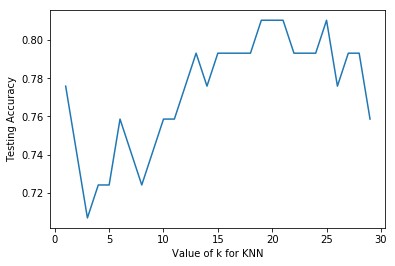

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

### Decision Tree

In [29]:
d_range = range(1, 30)
dscores = []

for k in d_range:
    dt = DecisionTreeClassifier(random_state=42, max_depth=k)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    dscores.append(accuracy_score(y_test, y_pred))
print(np.array(dscores).max())

0.7931034482758621


Text(0, 0.5, 'Testing Accuracy')

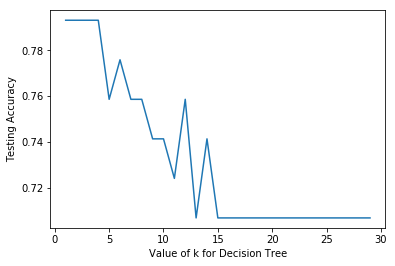

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(d_range, dscores)
plt.xlabel('Value of k for Decision Tree')
plt.ylabel('Testing Accuracy')

 Decision Tree and KNN models are selected as they both have higher accuracy score.

# Model Building
Considering the impact of PCA by considering only 5 attributes

In [31]:
colms = ['inv-nodes','node-caps','deg-malig','Class','tumor-size']

In [32]:
x_new = dataset[colms]
x_new.head()

,inv-nodes,node-caps,deg-malig,Class,tumor-size
0,0,1,3,1,2
1,0,0,1,0,2
2,0,0,2,1,6
3,0,1,3,0,6
4,4,1,2,1,5


In [33]:
from sklearn.model_selection import train_test_split
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_new, 
                                y, test_size=0.2, random_state=42)

### Decision Tree 

#### Parameter Tuning 

In [34]:
d_range = range(1, 30)
dscores = []

for k in d_range:
    dt = DecisionTreeClassifier(random_state=42, max_depth=k)
    dt.fit(x_train_n,y_train_n)
    y_pred = dt.predict(x_test_n)
    dscores.append(accuracy_score(y_test_n, y_pred))
print(np.array(dscores).max())

0.8448275862068966


Text(0, 0.5, 'Testing Accuracy')

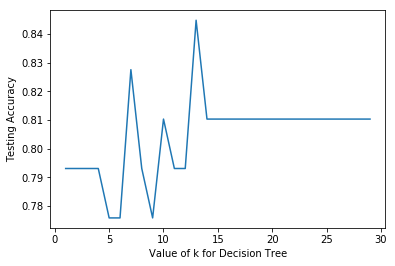

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(d_range, dscores)
plt.xlabel('Value of k for Decision Tree')
plt.ylabel('Testing Accuracy')

In [36]:
dt_new = DecisionTreeClassifier(random_state=42, 
                                max_depth=13).fit(x_train_n, y_train_n)

In [37]:
y_pred_dt_n = dt_new.predict(x_test_n)
print('Confusion Matrix:'+'\n' ,confusion_matrix(y_test_n, y_pred_dt_n))
print(classification_report(y_test_n, y_pred_dt_n))

Confusion Matrix:
 [[44  2]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.71      0.42      0.53        12

   micro avg       0.84      0.84      0.84        58
   macro avg       0.79      0.69      0.72        58
weighted avg       0.83      0.84      0.83        58



### KNN 

#### Parameter Tuning 

In [38]:
k_range = range(1, 30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_n,y_train_n)
    y_pred = knn.predict(x_test_n)
    scores.append(accuracy_score(y_test_n, y_pred))
#print(np.array(scores))
print(np.array(scores).max())

0.8620689655172413


Text(0, 0.5, 'Testing Accuracy')

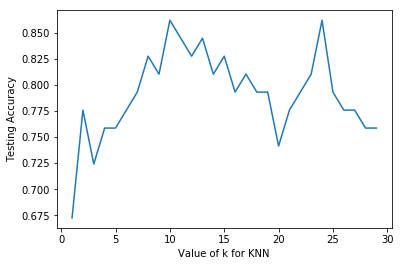

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [40]:
knn_n = KNeighborsClassifier(n_neighbors=24).fit(x_train_n, y_train_n)

In [41]:
y_pred_knn_n = knn_n.predict(x_test_n)

print('Confusion Matrix:'+'\n' ,confusion_matrix(y_test_n, y_pred_knn_n))
print(classification_report(y_test_n, y_pred_knn_n))

Confusion Matrix:
 [[45  1]
 [ 7  5]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        46
           1       0.83      0.42      0.56        12

   micro avg       0.86      0.86      0.86        58
   macro avg       0.85      0.70      0.74        58
weighted avg       0.86      0.86      0.84        58



Trade off between accuracy score and the cost of misclassification error when choosing the model.

When all the 9 attributes considered for model building, had a accuracy score of DTC(Decision Tree Classifier) - 81%, KNN(K Nearest Neighbor) - 79%. But when only 5 attributes were considered for model building, there was a increase in score of the models DTC(Decision Tree Classifier) - 84%, KNN(K Nearest Neighbor) - 86%.

Our objective was to minimize the misclassification error when predicting the requirement for undergoing for Chemotherapy. So in the first case DTC did well but in the second case KNN did well. Finally KNN model is chosen.